In [3]:
# import packages and update
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create dataframes of covid data from csv
# data downloaded from https://usafacts.org/visualizations/coronavirus-covid-19-spread-map
covid_cases = pd.read_csv("covid_confirmed_usafacts.csv")
covid_deaths = pd.read_csv("covid_deaths_usafacts.csv")
county_pop = pd.read_csv("covid_county_population_usafacts.csv")

cases_columns = list(covid_cases.columns)
deaths_columns = list(covid_deaths.columns)
pop_columns = list(county_pop.columns)


In [32]:
#print out column headers for the 3 data tables
print(cases_columns[:6])
print(deaths_columns[:6])
print(pop_columns)

covid_cases.head(20)

['countyFIPS', 'County Name', 'State', 'StateFIPS', '2020-01-22', '2020-01-23']
['countyFIPS', 'County Name', 'State', 'StateFIPS', '2020-01-22', '2020-01-23']
['countyFIPS', 'County Name', 'State', 'population']


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31,2023-02-01,2023-02-02,2023-02-03,2023-02-04,2023-02-05
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19471,19471,19471,19471,19471,19471,19530,19530,19530,19530
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,68983,68983,68983,68983,68983,68983,69187,69187,69187,69187
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7299,7299,7299,7299,7299,7299,7339,7339,7339,7339
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,7919,7919,7919,7919,7919,7919,7967,7967,7967,7967
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,18255,18255,18255,18255,18255,18255,18349,18349,18349,18349
6,1011,Bullock County,AL,1,0,0,0,0,0,0,...,2970,2970,2970,2970,2970,2970,2991,2991,2991,2991
7,1013,Butler County,AL,1,0,0,0,0,0,0,...,6410,6410,6410,6410,6410,6410,6449,6449,6449,6449
8,1015,Calhoun County,AL,1,0,0,0,0,0,0,...,40586,40586,40586,40586,40586,40586,40813,40813,40813,40813
9,1017,Chambers County,AL,1,0,0,0,0,0,0,...,10656,10656,10656,10656,10656,10656,10705,10705,10705,10705


In [45]:
#check the dimensions and if there are any missing values in the data tables
print(covid_cases.shape)
print(covid_deaths.shape)
print(county_pop.shape)

(3193, 1116)
(3193, 1143)
(3195, 4)


In [56]:
#find out which columns are missing in covid_cases that are present in covid_deaths since they have different number of columns
print(covid_cases.columns.difference(covid_deaths.columns))

print(covid_deaths.columns.difference(covid_cases.columns))

# check which additional rows are present in county_pop df that are missing in the other 2 datatables
print(county_pop[~county_pop['countyFIPS'].isin(covid_cases['countyFIPS'])])

Index([], dtype='object')
Index(['2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
       '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14', '2023-02-15',
       '2023-02-16', '2023-02-17', '2023-02-18', '2023-02-19', '2023-02-20',
       '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
       '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
       '2023-03-03', '2023-03-04', '2023-03-05'],
      dtype='object')
     countyFIPS                 County Name State  population
95         2270    Wade Hampton Census Area    AK           0
192        6000  Grand Princess Cruise Ship    CA           0


In [66]:
# add a columnn with totals for each row
covid_cases["total cases"] = covid_cases.iloc[:, 4:].sum(axis=1)
print(covid_cases["total cases"])

covid_deaths["total deaths"] = covid_deaths.iloc[:, 4:].sum(axis=1)


0            6444
1        60122808
2       210112134
3        21807066
4        24352074
          ...    
3188     40209660
3189     35818236
3190     20645460
3191      8727198
3192      5934768
Name: total cases, Length: 3193, dtype: int64


In [67]:
#find out if any of the dataframes have missing values
print(covid_cases.isna().values.any())

print(covid_deaths.isna().values.any())

print(county_pop.isna().values.any())

False
False
False


In [156]:
#combine data from the 3 dataframes into one combined table
pop_plus_cases = county_pop.merge(covid_cases, on=["countyFIPS", "State"], how='left')
pop_plus_cases.head(20)

pop_plus_cases.drop(pop_plus_cases.iloc[:,6:1118], axis=1, inplace=True)
pop_plus_cases.head(20)

pop_cases_deaths = pop_plus_cases.merge(covid_deaths, on=["countyFIPS", "State"], how='left')
pop_cases_deaths.head(20)

pop_cases_deaths.drop(pop_cases_deaths.iloc[:, 9:1149], axis=1, inplace=True)
pop_cases_deaths.head(20)

,countyFIPS,County Name_x,State,population,County Name_y,StateFIPS_x,total cases,County Name,StateFIPS_y,total deaths
0,0,Statewide Unallocated,AL,0,Statewide Unallocated,1.0,6444.0,Statewide Unallocated,1.0,0.0
1,1001,Autauga County,AL,55869,Autauga County,1.0,60122808.0,Autauga County,1.0,279320.0
2,1003,Baldwin County,AL,223234,Baldwin County,1.0,210112134.0,Baldwin County,1.0,886952.0
3,1005,Barbour County,AL,24686,Barbour County,1.0,21807066.0,Barbour County,1.0,133272.0
4,1007,Bibb County,AL,22394,Bibb County,1.0,24352074.0,Bibb County,1.0,145844.0
5,1009,Blount County,AL,57826,Blount County,1.0,57394806.0,Blount County,1.0,322504.0
6,1011,Bullock County,AL,10101,Bullock County,1.0,9687732.0,Bullock County,1.0,80876.0
7,1013,Butler County,AL,19448,Butler County,1.0,19944510.0,Butler County,1.0,180076.0
8,1015,Calhoun County,AL,113605,Calhoun County,1.0,124365270.0,Calhoun County,1.0,823770.0
9,1017,Chambers County,AL,33254,Chambers County,1.0,33008706.0,Chambers County,1.0,248050.0


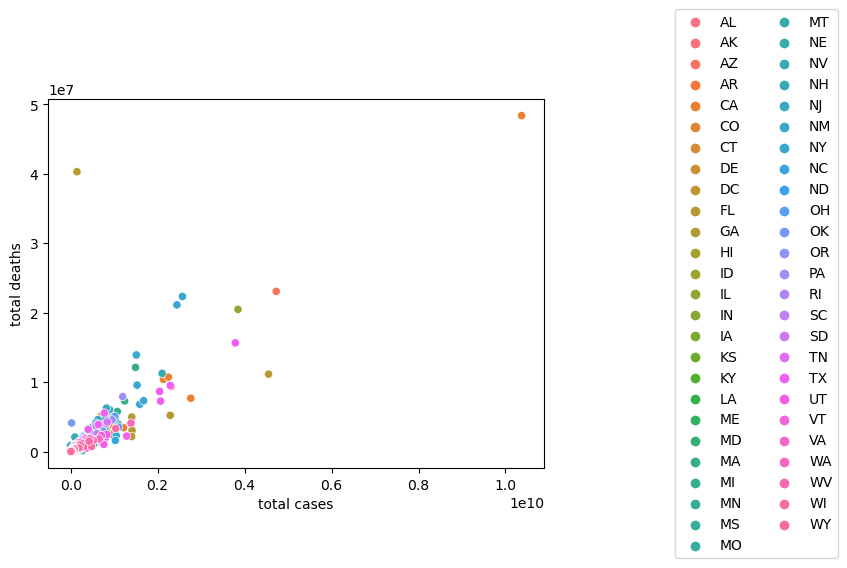

In [173]:
#plot cases to death numbers for each county 

sns.scatterplot(x='total cases', y='total deaths', data=pop_cases_deaths, hue='State')
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=2)
plt.xscale='log2'
#plt.yscale='log'


In [187]:
#create data table with number of cases and deaths total for each state

by_state_cases = pop_cases_deaths.groupby("State")["population", "total cases", "total deaths"].agg(sum)
by_state_cases['State'] = by_state_cases.index
by_state_cases.head(20)

/var/folders/wx/l2n0h9dn3pz189307rv_04d40000gn/T/ipykernel_22378/1388145853.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  by_state_cases = pop_cases_deaths.groupby("State")["population", "total cases", "total deaths"].agg(sum)


,population,total cases,total deaths,State
State,,,,
AK,731545,8.067622e+08,1447164.0,AK
AL,4903185,4.918516e+09,26618284.0,AL
AR,3017804,3.042847e+09,15335862.0,AR
AZ,7278717,7.513223e+09,40338076.0,AZ
CA,39512223,3.266279e+10,131698018.0,CA
CO,5758736,5.048313e+09,17183062.0,CO
CT,3565287,2.851374e+09,17482312.0,CT
DC,705749,5.054277e+08,2262550.0,DC
DE,973764,9.674444e+08,4104352.0,DE


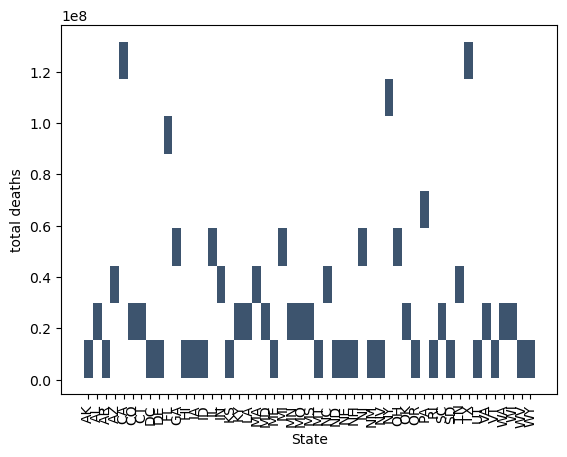

In [201]:
#by_state_cases.info()
sns.histplot(data=by_state_cases, x="State", y=("total deaths"))
plt.tick_params(axis='x', rotation=90)